### Importation des librairies et des fichiers :

In [1]:
import pandas as pd 
LFB2 = pd.read_csv('LFB2.csv')

In [3]:
LFB2.head()

,Unnamed: 0,CalYear,HourOfCall,StopCodeDescription,PropertyCategory,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,DeployedFromStation_Name,Meteo,Visibility
0,0,2009,0,Special Service,Road Vehicle,528650,176850,319,Battersea,météo très défavorable,moyenne
1,1,2009,0,Secondary Fire,Outdoor,533750,194450,308,Edmonton,météo très défavorable,moyenne
2,2,2009,0,Secondary Fire,Outdoor,507750,182850,210,Hillingdon,météo très défavorable,moyenne
3,3,2009,0,Secondary Fire,Outdoor,531050,185350,233,Holloway,météo très défavorable,moyenne
4,4,2009,0,AFA,Dwelling,529450,185250,172,Kentish Town,météo très défavorable,moyenne


In [7]:
LFB2.head()

,CalYear,HourOfCall,StopCodeDescription,PropertyCategory,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,DeployedFromStation_Name,Meteo,Visibility
0,2009,0,Special Service,Road Vehicle,528650,176850,319,Battersea,météo très défavorable,moyenne
1,2009,0,Secondary Fire,Outdoor,533750,194450,308,Edmonton,météo très défavorable,moyenne
2,2009,0,Secondary Fire,Outdoor,507750,182850,210,Hillingdon,météo très défavorable,moyenne
3,2009,0,Secondary Fire,Outdoor,531050,185350,233,Holloway,météo très défavorable,moyenne
4,2009,0,AFA,Dwelling,529450,185250,172,Kentish Town,météo très défavorable,moyenne


### Modification de la variable cible numérique en variable binaire
### (1 si temps inférieur à 6minutes sinon 0) :

In [9]:
LFB2['attendance_time_inf_6min'] = (LFB2['FirstPumpArriving_AttendanceTime']< 360).astype(int)

In [11]:
LFB2.head()

,CalYear,HourOfCall,StopCodeDescription,PropertyCategory,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,DeployedFromStation_Name,Meteo,Visibility,attendance_time_inf_6min
0,2009,0,Special Service,Road Vehicle,528650,176850,319,Battersea,météo très défavorable,moyenne,1
1,2009,0,Secondary Fire,Outdoor,533750,194450,308,Edmonton,météo très défavorable,moyenne,1
2,2009,0,Secondary Fire,Outdoor,507750,182850,210,Hillingdon,météo très défavorable,moyenne,1
3,2009,0,Secondary Fire,Outdoor,531050,185350,233,Holloway,météo très défavorable,moyenne,1
4,2009,0,AFA,Dwelling,529450,185250,172,Kentish Town,météo très défavorable,moyenne,1


In [13]:
# Suppression de la variable cible numérique de départ
LFB2_cat = LFB2.drop(columns = ['FirstPumpArriving_AttendanceTime'], axis = 0)

In [15]:
LFB2_cat.head()

,CalYear,HourOfCall,StopCodeDescription,PropertyCategory,Easting_rounded,Northing_rounded,DeployedFromStation_Name,Meteo,Visibility,attendance_time_inf_6min
0,2009,0,Special Service,Road Vehicle,528650,176850,Battersea,météo très défavorable,moyenne,1
1,2009,0,Secondary Fire,Outdoor,533750,194450,Edmonton,météo très défavorable,moyenne,1
2,2009,0,Secondary Fire,Outdoor,507750,182850,Hillingdon,météo très défavorable,moyenne,1
3,2009,0,Secondary Fire,Outdoor,531050,185350,Holloway,météo très défavorable,moyenne,1
4,2009,0,AFA,Dwelling,529450,185250,Kentish Town,météo très défavorable,moyenne,1


In [17]:
# Importation du fichier au format csv :
LFB2_cat.to_csv('LFB2_cat.csv')

## Nouveau préprocessing de nos variables :

### Remplacement des valeurs manquantes et séparation de nos données en jeu d'entrainement et jeu de test :

In [18]:
import numpy as np
from sklearn.impute import SimpleImputer
imput = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
from sklearn.model_selection import train_test_split

In [19]:
feats = LFB2_cat.drop(columns = ['attendance_time_inf_6min'], axis = 1)
target = LFB2_cat['attendance_time_inf_6min']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state = 42)

In [25]:
X_train = imput.fit_transform(X_train)
X_test = imput.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train, columns= ['CalYear','HourOfCall','StopCodeDescription',
                                          'PropertyCategory','Easting_rounded','Northing_rounded',
                                          'DeployedFromStation_Name','Meteo','Visibility'])
X_test = pd.DataFrame(X_test, columns=['CalYear','HourOfCall','StopCodeDescription',
                                          'PropertyCategory','Easting_rounded','Northing_rounded',
                                          'DeployedFromStation_Name','Meteo','Visibility'])

### Encodage des Variables catégorielles avec Frequency Encoding

In [30]:
columns = ["DeployedFromStation_Name","Easting_rounded","Northing_rounded"]
frequencies = {}

for col in columns:
    frequencies[col] = X_train[col].value_counts(normalize=True).to_dict()
    frequencies[col]["Unknown"] = 0 

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

for col in columns:
    X_train_encoded[col] = X_train_encoded[col].map(frequencies[col])
    X_test_encoded[col] = X_test_encoded[col].map(frequencies[col]).fillna(frequencies[col]["Unknown"])

### Encodage des variables ordinales avec Ordinal Encoding :

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
encoder1 = OrdinalEncoder(categories = [['météo très défavorable', 'météo défavorable',
                                         'météo correcte', 'météo favorable', 'météo idéale']])
encoder2 = OrdinalEncoder(categories = [['très mauvaise', 'moyenne', 'très bonne']])

In [37]:
X_train_encoded['Meteo_encoded'] = encoder1.fit_transform(X_train_encoded[['Meteo']])
X_test_encoded['Meteo_encoded'] = encoder1.transform(X_test_encoded[['Meteo']])

In [39]:
X_train_encoded['Visibility_encoded'] = encoder2.fit_transform(X_train_encoded[['Visibility']])
X_test_encoded['Visibility_encoded'] = encoder2.transform(X_test_encoded[['Visibility']])

### Encodage des variables catégorielles à moins de 15 valeurs avec OneHotEncoding

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
col_cat = ['StopCodeDescription','PropertyCategory']
encoder = OneHotEncoder(drop='first', sparse_output = False, handle_unknown = 'ignore')
X_train_code = encoder.fit_transform(X_train_encoded[col_cat])
X_test_code = encoder.transform(X_test_encoded[col_cat])
encoded_columns = encoder.get_feature_names_out(col_cat)
X_train_code_df = pd.DataFrame(X_train_code, columns = encoded_columns)
X_test_code_df = pd.DataFrame(X_test_code, columns = encoded_columns)
X_train_encoded = X_train_encoded.reset_index(drop = True)
X_train_code_df = X_train_code_df.reset_index(drop = True)

X_test_encoded = X_test_encoded.reset_index(drop = True)
X_test_code_df = X_test_code_df.reset_index(drop = True)

### Standardisation des variables numériques :

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled = scaler.fit_transform(X_train_scaled[['HourOfCall', 'CalYear']])
X_test_scaled = scaler.transform(X_test_scaled[['HourOfCall','CalYear']])

In [49]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = ['Hour','Year'])
X_train_scaled_df = X_train_scaled_df.reset_index(drop = True)

In [52]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = ['Hour','Year'])
X_test_scaled_df = X_test_scaled_df.reset_index(drop = True)

In [54]:
X_train_scaled_df.columns

Index(['Hour', 'Year'], dtype='object')

In [56]:
# Concaténation des fichiers :
X_train = pd.concat([X_train_encoded, X_train_code_df, X_train_scaled_df], axis = 1)
X_test = pd.concat([X_test_encoded, X_test_code_df, X_test_scaled_df], axis = 1)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233308 entries, 0 to 1233307
Data columns (total 29 columns):
 #   Column                                              Non-Null Count    Dtype  
---  ------                                              --------------    -----  
 0   CalYear                                             1233308 non-null  object 
 1   HourOfCall                                          1233308 non-null  object 
 2   StopCodeDescription                                 1233308 non-null  object 
 3   PropertyCategory                                    1233308 non-null  object 
 4   Easting_rounded                                     1233308 non-null  float64
 5   Northing_rounded                                    1233308 non-null  float64
 6   DeployedFromStation_Name                            1233308 non-null  float64
 7   Meteo                                               1233308 non-null  object 
 8   Visibility                                          

### Suppression des colonnes originale des variables encodées :

In [61]:
X_train = X_train.drop(['StopCodeDescription','PropertyCategory', 'Meteo', 'Visibility', 'HourOfCall','CalYear'], axis = 1)
X_test = X_test.drop(['StopCodeDescription','PropertyCategory', 'Meteo', 'Visibility','HourOfCall','CalYear'], axis = 1)

In [63]:
# Enregistrement des fichiers en format csv des fichiers de ML binaire :
X_train.to_csv('X_train_bi.csv')
X_test.to_csv('X_test_bi.csv')
y_train.to_csv('y_train_bi.csv')
y_test.to_csv('y_test_bi.csv')

## Decision Tree Classifier :

In [64]:
from sklearn.tree import DecisionTreeClassifier 
DC = DecisionTreeClassifier(random_state = 42)
model = DC.fit(X_train, y_train)

In [67]:
proba = DC.predict_proba(X_test)
y_pred = (proba[:, 1] >= 0.5).astype(int)
predictionDC = DC.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
predictionDC = DC.predict(X_test)
print(classification_report(y_test, predictionDC))
display(pd.crosstab(y_test, predictionDC, rownames = ['Réalité'], colnames = ['Prediciton']))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49     89026
           1       0.79      0.79      0.79    219301

    accuracy                           0.70    308327
   macro avg       0.64      0.64      0.64    308327
weighted avg       0.70      0.70      0.70    308327



Prediciton,0,1
Réalité,,
0,44301,44725
1,47059,172242


In [72]:
print(classification_report(y_test, y_pred))
display(pd.crosstab(y_test, y_pred, rownames = ['Réalité'], colnames = ['Prediciton']))
#Tableau des prédicitons des probabilités 

              precision    recall  f1-score   support

           0       0.49      0.49      0.49     89026
           1       0.79      0.79      0.79    219301

    accuracy                           0.70    308327
   macro avg       0.64      0.64      0.64    308327
weighted avg       0.70      0.70      0.70    308327



Prediciton,0,1
Réalité,,
0,44034,44992
1,46472,172829


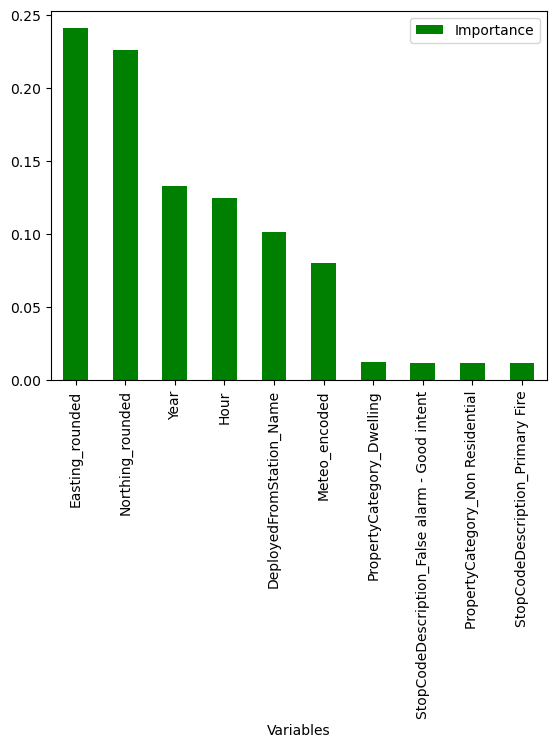

In [80]:
# Représentation graphique de l'importance des variables :
feat_importance = pd.DataFrame({'Variables' : X_train.columns, 'Importance' : DC.feature_importances_}).sort_values(by = 'Importance', ascending = False)
feat_importance.nlargest(10, 'Importance').plot.bar('Variables', 'Importance', color = 'green');

In [82]:
print(sum(DC.feature_importances_))
# Compréhension des valeurs

1.0


## XGB Classifier :

In [84]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [85]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric="logloss")
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [86]:
y_prediction = model.predict(X_test)

In [87]:
print(classification_report(y_test, y_prediction))
display(pd.crosstab(y_test, y_prediction, rownames = ['Réalité'], colnames = ['Prediciton']))
#Le modèle ne prédit pas correctement les classes négatives.

              precision    recall  f1-score   support

           0       0.68      0.15      0.24     89026
           1       0.74      0.97      0.84    219301

    accuracy                           0.73    308327
   macro avg       0.71      0.56      0.54    308327
weighted avg       0.72      0.73      0.67    308327



Prediciton,0,1
Réalité,,
0,13093,75933
1,6132,213169


## Random Forest Classifier : 

In [89]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
prediction = RF.predict(X_test)

display(pd.crosstab(y_test, prediction, rownames = ['Réalité'], colnames = ['Prediciton']))
print(classification_report(y_test, prediction))

Prediciton,0,1
Réalité,,
0,27528,61498
1,17377,201924


              precision    recall  f1-score   support

           0       0.61      0.31      0.41     89026
           1       0.77      0.92      0.84    219301

    accuracy                           0.74    308327
   macro avg       0.69      0.61      0.62    308327
weighted avg       0.72      0.74      0.71    308327



In [91]:
X_test.shape


(308327, 23)